In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/seattle-weather.csv')
print(data.shape)
data=data.drop('date',axis=1)
print(data.head(15))
print(data.columns)

(1461, 6)
    precipitation  temp_max  temp_min  wind  weather
0             0.0      12.8       5.0   4.7  drizzle
1            10.9      10.6       2.8   4.5     rain
2             0.8      11.7       7.2   2.3     rain
3            20.3      12.2       5.6   4.7     rain
4             1.3       8.9       2.8   6.1     rain
5             2.5       4.4       2.2   2.2     rain
6             0.0       7.2       2.8   2.3     rain
7             0.0      10.0       2.8   2.0      sun
8             4.3       9.4       5.0   3.4     rain
9             1.0       6.1       0.6   3.4     rain
10            0.0       6.1      -1.1   5.1      sun
11            0.0       6.1      -1.7   1.9      sun
12            0.0       5.0      -2.8   1.3      sun
13            4.1       4.4       0.6   5.3     snow
14            5.3       1.1      -3.3   3.2     snow
Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


In [ ]:
print(data['weather'].value_counts())

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64


In [ ]:
x = data.drop('weather',axis=1)
print(x.shape)
y = data['weather']
print(y.shape)
print(type (x))
print(type(y))


(1461, 4)
(1461,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 2 2 ... 1 4 4]


In [ ]:
#Splitting Training and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
check_nan = x_test.isnull().values.any()
print(check_nan)

(1168, 4)
(293, 4)
(1168,)
(293,)
False


GaussianNaiveBayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
print(nb.fit(x_train,y_train))

GaussianNB()


In [ ]:
y_pred1=nb.predict(x_test)
result1=pd.DataFrame({'Actual':y_test,'Predictions':y_pred1})
print(result1.head())

   Actual  Predictions
0       0            4
1       4            4
2       2            4
3       4            4
4       2            2


[[  2   0   0   0   9]
 [  0   0   0   0  29]
 [  0   0 119   2   7]
 [  0   0   4   2   0]
 [  1   0   0   0 118]]


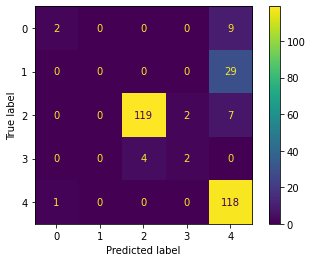

None


In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
print(confusion_matrix(y_test,y_pred1))
cm=confusion_matrix(y_test,y_pred1)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = nb.classes_)
cm_disp.plot()
print(plt.show())


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.67      0.18      0.29        11
           1       0.00      0.00      0.00        29
           2       0.97      0.93      0.95       128
           3       0.50      0.33      0.40         6
           4       0.72      0.99      0.84       119

    accuracy                           0.82       293
   macro avg       0.57      0.49      0.49       293
weighted avg       0.75      0.82      0.77       293



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred1))

0.8225255972696246


DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
print(classifier.fit(x_train,y_train))
# make predictions
y_pred2=classifier.predict(x_test)
result2=pd.DataFrame({'Actual':y_test,'Prediction':y_pred2})
print(result2.head())

DecisionTreeClassifier()
   Actual  Prediction
0       0           4
1       4           0
2       2           1
3       4           4
4       2           2


[[  0   2   1   0   8]
 [  3   5   2   0  19]
 [  0   1 120   1   6]
 [  0   0   5   1   0]
 [ 10  11   7   0  91]]


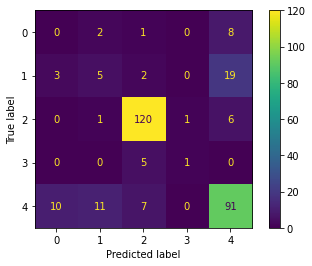

None


In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
print(confusion_matrix(y_test,y_pred2))
confusion_matrix=confusion_matrix(y_test,y_pred2)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = classifier.classes_)
cm_display.plot()
print(plt.show())

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.26      0.17      0.21        29
           2       0.89      0.94      0.91       128
           3       0.50      0.17      0.25         6
           4       0.73      0.76      0.75       119

    accuracy                           0.74       293
   macro avg       0.48      0.41      0.42       293
weighted avg       0.72      0.74      0.73       293



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred2))

0.7406143344709898


RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
print(rf.fit(x_train,y_train))

RandomForestClassifier()


In [ ]:
y_pred3 = rf.predict(x_test)

result3=pd.DataFrame({'Actual':y_test,'Prediction':y_pred3})
print(result3.head())


   Actual  Prediction
0       0           4
1       4           4
2       2           1
3       4           4
4       2           2


[[  1   0   0   0  10]
 [  0   6   1   0  22]
 [  0   1 121   0   6]
 [  0   0   5   1   0]
 [  2   4   1   0 112]]


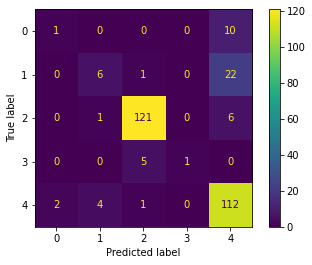

None


In [ ]:

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
print(confusion_matrix(y_test,y_pred3))
confusion_matrix=confusion_matrix(y_test,y_pred3)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = rf.classes_)
cm_display.plot()
print(plt.show())

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.33      0.09      0.14        11
           1       0.55      0.21      0.30        29
           2       0.95      0.95      0.95       128
           3       1.00      0.17      0.29         6
           4       0.75      0.94      0.83       119

    accuracy                           0.82       293
   macro avg       0.71      0.47      0.50       293
weighted avg       0.80      0.82      0.79       293



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred3))

0.8225255972696246


In [ ]:
#Feature Extraction
feature_importances=pd.DataFrame(rf.feature_importances_,index=x_train.columns,columns=['importance']).sort_values('importance')
print(feature_importances)

               importance
wind             0.147859
temp_min         0.148959
temp_max         0.186641
precipitation    0.516541


KNeighborsClassifier(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=8)
print(model.fit(x_train,y_train))

KNeighborsClassifier(n_neighbors=8)


In [ ]:
y_pred4=model.predict(x_test)
result4=pd.DataFrame({'Actual':y_test,'Prediction':y_pred4})
print(result4.head())

   Actual  Prediction
0       0           4
1       4           4
2       2           2
3       4           4
4       2           2


[[  1   0   0   0  10]
 [  0   0   2   0  27]
 [  0   2 108   0  18]
 [  1   0   3   1   1]
 [  0   4   9   0 106]]


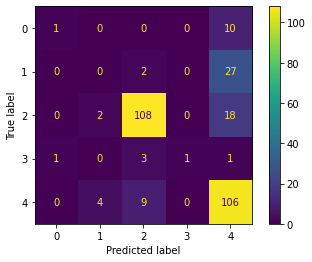

None


In [ ]:

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
print(confusion_matrix(y_test,y_pred4))
confusion_matrix=confusion_matrix(y_test,y_pred4)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =model.classes_)
cm_display.plot()
print(plt.show())

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.50      0.09      0.15        11
           1       0.00      0.00      0.00        29
           2       0.89      0.84      0.86       128
           3       1.00      0.17      0.29         6
           4       0.65      0.89      0.75       119

    accuracy                           0.74       293
   macro avg       0.61      0.40      0.41       293
weighted avg       0.69      0.74      0.70       293



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred4))

0.7372013651877133


LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')
print(lr.fit(x_train,y_train))

LogisticRegression(solver='liblinear')


In [ ]:
y_pred5=lr.predict(x_test)
result5=pd.DataFrame({'Actual':y_test,'Prediction':y_pred5})
print(result5.head())

   Actual  Prediction
0       0           4
1       4           4
2       2           2
3       4           4
4       2           2


[[  0   0   2   0   9]
 [  0   0   3   0  26]
 [  0   0 119   0   9]
 [  0   0   6   0   0]
 [  0   0   5   0 114]]


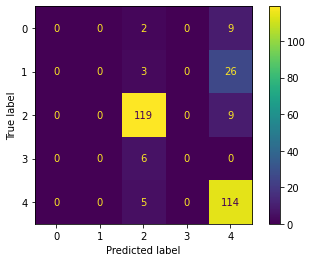

None


In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
print(confusion_matrix(y_test,y_pred5))
confusion_matrix=confusion_matrix(y_test,y_pred5)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =lr.classes_)
cm_display.plot()
print(plt.show())

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        29
           2       0.88      0.93      0.90       128
           3       0.00      0.00      0.00         6
           4       0.72      0.96      0.82       119

    accuracy                           0.80       293
   macro avg       0.32      0.38      0.35       293
weighted avg       0.68      0.80      0.73       293



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred5))

0.7952218430034129


XGBClassifier (Extreme Gradient Boosting)

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
print(xgb.fit(x_train,y_train))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


In [ ]:
y_pred6=xgb.predict(x_test)
result6=pd.DataFrame({'Actual':y_test,'Prediction':y_pred6})
print(result6.head())

   Actual  Prediction
0       0           4
1       4           4
2       2           1
3       4           4
4       2           2


[[  1   1   0   0   9]
 [  1   4   0   0  24]
 [  0   1 121   0   6]
 [  0   0   5   1   0]
 [  3   8   3   0 105]]


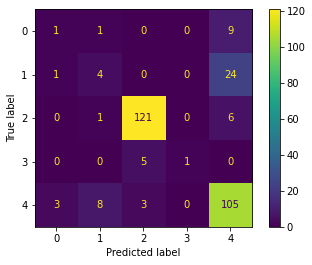

None


In [ ]:

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
print(confusion_matrix(y_test,y_pred6))
confusion_matrix=confusion_matrix(y_test,y_pred6)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =xgb.classes_)
cm_display.plot()
print(plt.show())

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.20      0.09      0.13        11
           1       0.29      0.14      0.19        29
           2       0.94      0.95      0.94       128
           3       1.00      0.17      0.29         6
           4       0.73      0.88      0.80       119

    accuracy                           0.79       293
   macro avg       0.63      0.44      0.47       293
weighted avg       0.76      0.79      0.76       293



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred6))

0.7918088737201365


Feature Extraction

In [ ]:
#Feature Extraction
feature_importances=pd.DataFrame(xgb.feature_importances_,index=x_train.columns,columns=['importance']).sort_values('importance')
print(feature_importances)

               importance
wind             0.034426
temp_max         0.039522
temp_min         0.042155
precipitation    0.883897


In [ ]:
X = pd.DataFrame(data,columns=['temp_min','temp_max','precipitation'])
#y = data['weather']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
from xgboost import XGBClassifier
xgb=XGBClassifier()
print(xgb.fit(X_train,y_train))
y_pred7 = xgb.predict(X_test)

result7=pd.DataFrame({'Actual':y_test,'Prediction':y_pred7})
print(result7.head())


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
   Actual  Prediction
0       2           2
1       1           4
2       4           4
3       2           2
4       2           2


[[  3   1   0   0   8]
 [  1   0   1   0  10]
 [  0   1 128   1   9]
 [  0   0   6   1   0]
 [  0   6   2   0 115]]


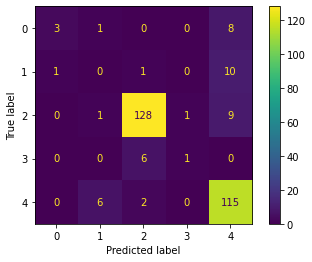

              precision    recall  f1-score   support

           0       0.75      0.25      0.38        12
           1       0.00      0.00      0.00        12
           2       0.93      0.92      0.93       139
           3       0.50      0.14      0.22         7
           4       0.81      0.93      0.87       123

    accuracy                           0.84       293
   macro avg       0.60      0.45      0.48       293
weighted avg       0.83      0.84      0.83       293



In [ ]:

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
print(confusion_matrix(y_test,y_pred7))
confusion_matrix=confusion_matrix(y_test,y_pred7)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = xgb.classes_)
cm_display.plot()
plt.show()
print(classification_report(y_test, y_pred7))

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred7))

0.8430034129692833


Accuracy is increased from 0.82 to 0.86